In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from leela_interp.core.fifth_move_study import *
from leela_interp.core.general_study import *

In [3]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = Lc0sight("lc0.onnx", device=device)

Using device: cpu


# Find and export puzzle sets

In [4]:
general_study = GeneralStudy(puzzlename='')
general_study.find_result_sets(include_starting=False, n_examples=50)
general_study.export_puzzle_set_info()
general_study.find_result_sets(include_starting=True, n_examples=50)
general_study.export_puzzle_set_info()

No residual stream results found.
No attention head results found.


AttributeError: 'GeneralStudy' object has no attribute 'all_attentions'

# Residual stream

In [4]:
study = FifthMoveStudy(load_all=False)

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/fifth_move_study.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.effect_sets[tag][possibility] = torch.load(

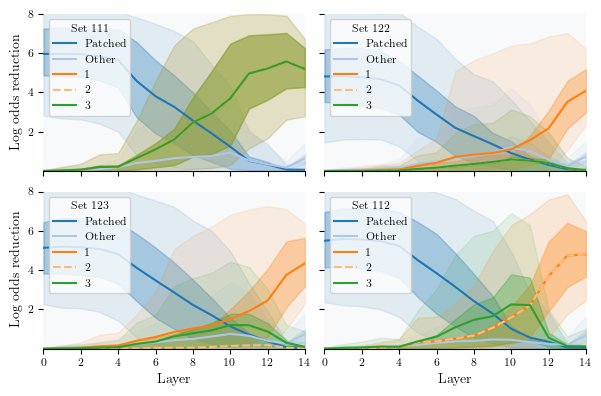

<Figure size 640x480 with 0 Axes>

In [6]:
possibilities = study.get_possibility_list('n', lengths=[3])
study.plot_residual_effects_grid('n', possibilities, n_cols=2, filename="residual_effects_3.pdf")

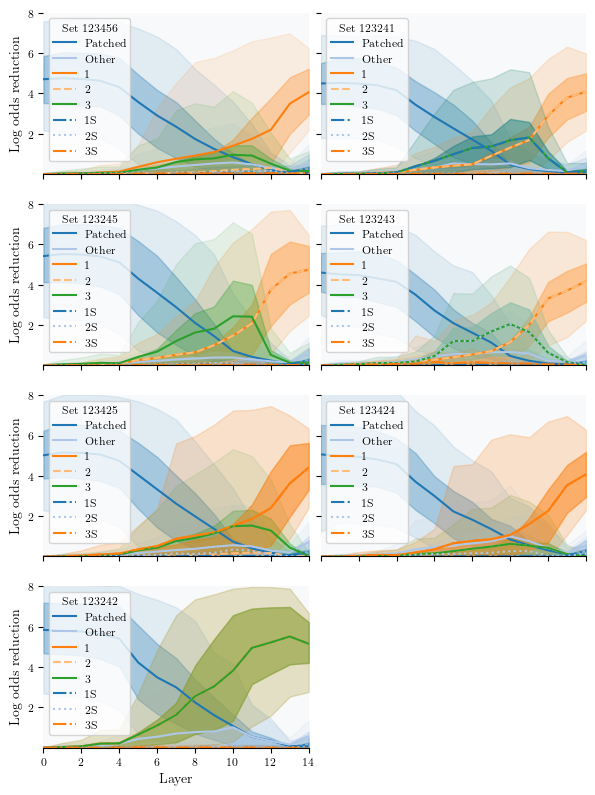

<Figure size 640x480 with 0 Axes>

In [7]:
possibilities = study.get_possibility_list('s', lengths=[3])
study.plot_residual_effects_grid('s', possibilities, n_cols=2, filename="residual_effects_3_starting.pdf")

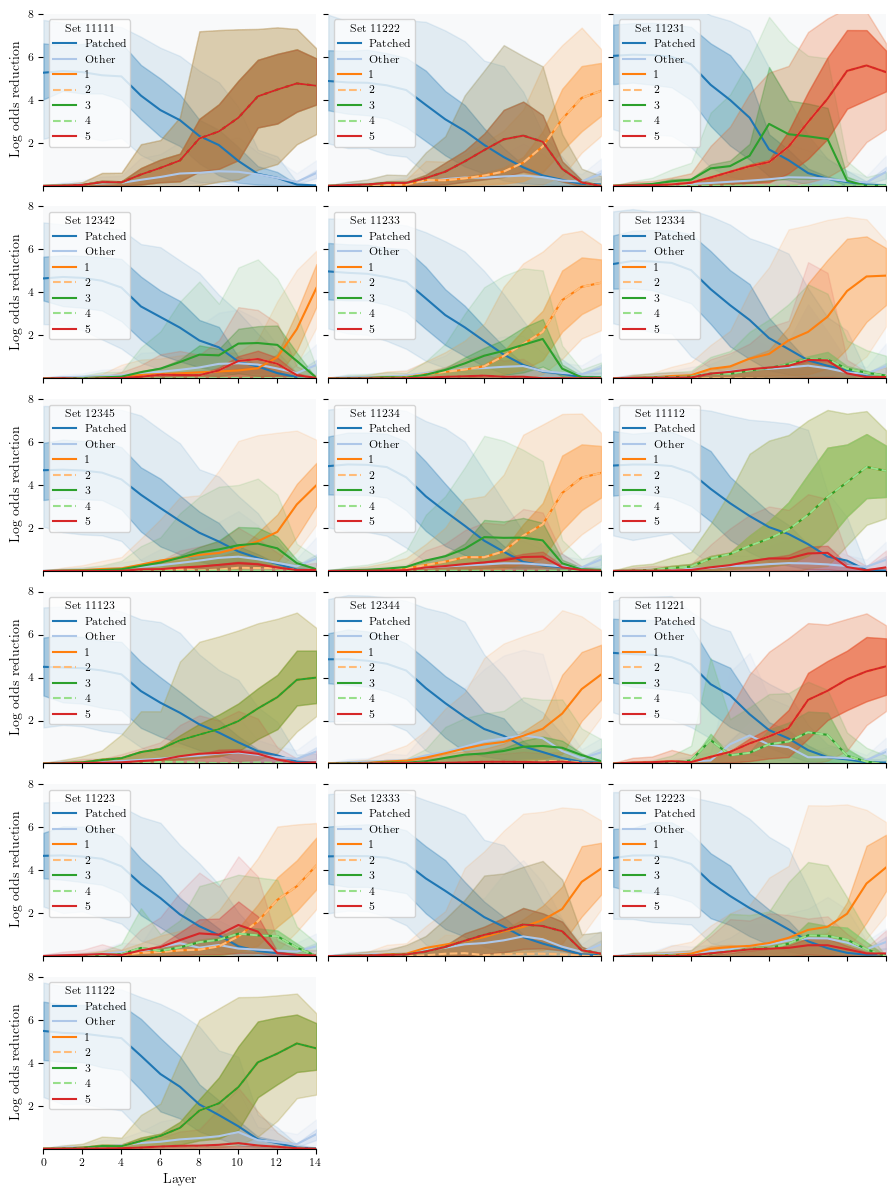

<Figure size 640x480 with 0 Axes>

In [8]:
possibilities = study.get_possibility_list('n', lengths=[5])
study.plot_residual_effects_grid('n', possibilities, n_cols=3, filename="residual_effects_5.pdf")

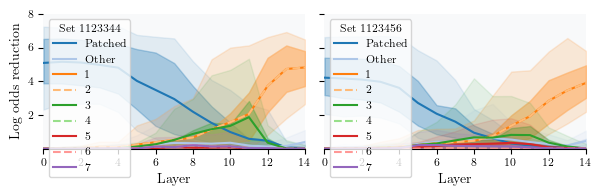

<Figure size 640x480 with 0 Axes>

In [9]:
possibilities = study.get_possibility_list('n', lengths=[7])
study.plot_residual_effects_grid('n', possibilities, n_cols=2, filename="residual_effects_7.pdf")

## Attention heads

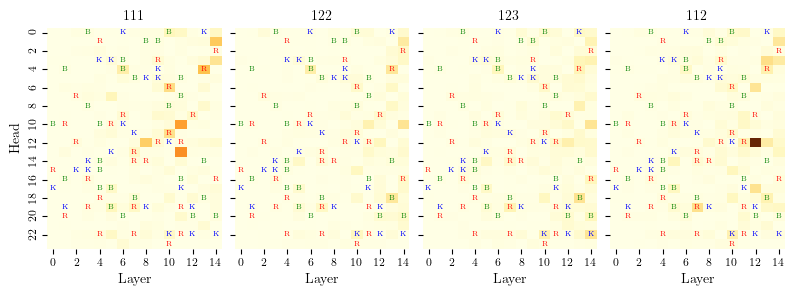

<Figure size 640x480 with 0 Axes>

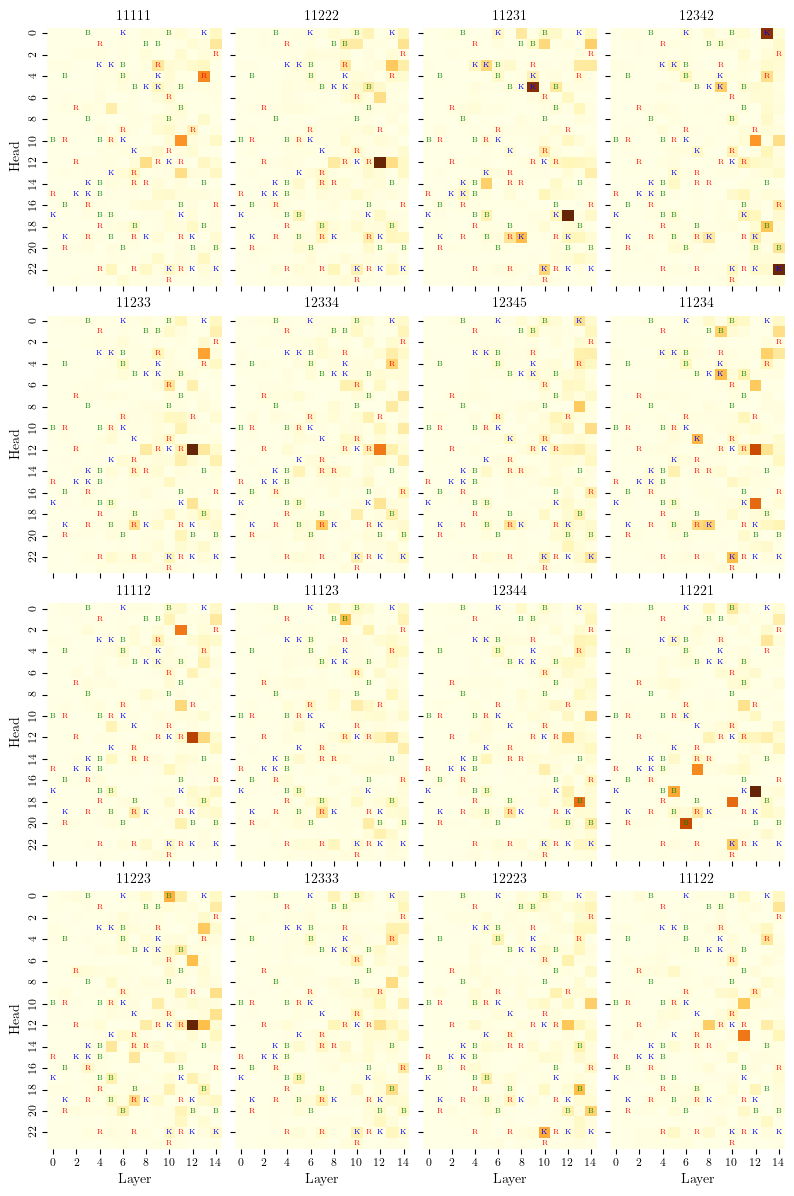

<Figure size 640x480 with 0 Axes>

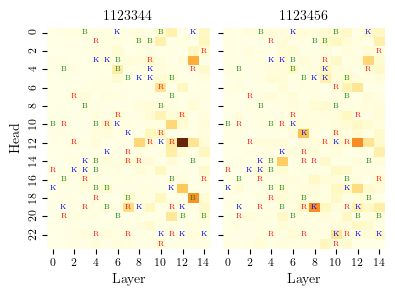

<Figure size 640x480 with 0 Axes>

In [12]:
possibilities = study.get_possibility_list('n', lengths=[3])
study.plot_attention_grid('n', possibilities, n_cols=4, vmax=0.73, filename="attention_grid_3.pdf")
possibilities = study.get_possibility_list('n', lengths=[5])
study.plot_attention_grid('n', possibilities, n_cols=4, vmax=0.73, filename="attention_grid_5.pdf")
possibilities = study.get_possibility_list('n', lengths=[7])
study.plot_attention_grid('n', possibilities, n_cols=2, vmax=0.73, filename="attention_grid_7.pdf")

In [80]:
def dict_to_latex_table_2(data_dict, all_heads_mean):
    # Get the keys and sort them
    keys = sorted(data_dict.keys())
    
    # Get the shape of the first array to determine the number of columns
    first_array = data_dict[keys[0]]
    num_rows, num_cols = first_array.shape
    
    # Flatten the all_heads_mean array and get indices of top 10 values
    flat_indices = np.argsort(all_heads_mean.flatten())[-10:]
    
    # Convert flat indices to 2D indices
    columns_to_include = [(idx // num_cols, idx % num_cols) for idx in flat_indices[::-1]]
    
    # Start the LaTeX table
    latex_table = "\\begin{tabular}{l|" + "c" * len(columns_to_include) + "}\n"
    latex_table += "Key & " + " & ".join([f"L{i}H{j}" for i, j in columns_to_include]) + " \\\\\n"
    latex_table += "\\hline\n"
    
    # Add data rows
    for key in keys:
        array = np.nan_to_num(data_dict[key])
        row_data = []
        for i, j in columns_to_include:
            value = array[i, j]
            if abs(value) > 0.3:
                row_data.append(f"\\textbf{{{value:.2f}}}")
            elif abs(value) < 0.1:
                row_data.append(f"\\textcolor{{gray}}{{{value:.2f}}}")
            else:
                row_data.append(f"{value:.2f}")
        latex_table += f"{key} & " + " & ".join(row_data) + " \\\\\n"
    
    # End the LaTeX table
    latex_table += "\\end{tabular}"
    
    return latex_table

# Example usage
latex_output_2 = dict_to_latex_table_2(study.all_heads, all_heads_mean)
print(latex_output_2)


\begin{tabular}{l|cccccccccc}
Key & L12H12 & L12H17 & L7H19 & L13H3 & L5H14 & L12H6 & L10H22 & L13H12 & L14H1 & L13H18 \\
\hline
111 & \textcolor{gray}{0.02} & \textcolor{gray}{0.00} & \textcolor{gray}{0.08} & \textcolor{gray}{0.03} & \textcolor{gray}{0.04} & \textcolor{gray}{0.01} & \textcolor{gray}{0.05} & \textcolor{gray}{0.02} & 0.10 & \textcolor{gray}{0.09} \\
112 & \textbf{0.52} & 0.16 & 0.19 & 0.16 & 0.13 & 0.15 & \textcolor{gray}{0.10} & 0.13 & 0.11 & \textcolor{gray}{0.07} \\
11223 & \textbf{0.63} & \textcolor{gray}{0.10} & 0.18 & 0.21 & 0.20 & 0.27 & \textcolor{gray}{0.08} & 0.27 & \textcolor{gray}{0.09} & 0.10 \\
11231 & \textcolor{gray}{0.09} & \textbf{0.96} & 0.16 & 0.15 & 0.18 & 0.10 & 0.14 & \textcolor{gray}{0.09} & 0.17 & \textcolor{gray}{0.04} \\
11233 & \textbf{0.57} & 0.24 & 0.20 & 0.15 & 0.10 & 0.11 & 0.13 & \textcolor{gray}{0.09} & 0.11 & \textcolor{gray}{0.02} \\
11234 & \textbf{0.50} & \textbf{0.38} & 0.21 & 0.21 & 0.15 & 0.23 & \textbf{0.32} & 0.20 & 0.16 & \tex

In [66]:
# Print the results
for head, possibilities in study.head_to_possibilities.items():
    print(f"Head {head}: {len(possibilities)} possibilities")
    print(f"  {', '.join(possibilities)}")
    print()

Head (12, 12): 2 possibilities
  112, 123

Head (13, 4): 2 possibilities
  111, 122

Head (14, 1): 2 possibilities
  111, 122

Head (13, 18): 2 possibilities
  123, 122

Head (14, 10): 2 possibilities
  122, 123

Head (13, 3): 1 possibilities
  112

Head (7, 19): 1 possibilities
  112

Head (12, 17): 1 possibilities
  112

Head (12, 6): 1 possibilities
  112

Head (11, 13): 1 possibilities
  111

Head (11, 10): 1 possibilities
  111

Head (8, 12): 1 possibilities
  111

Head (14, 22): 1 possibilities
  123

Head (10, 22): 1 possibilities
  123

Head (6, 4): 1 possibilities
  122



In [69]:
# Print the results
for head, possibilities in study.head_to_possibilities_with_effects.items():
    print(f"Head {head}:")
    for possibility, effect in possibilities:
        print(f"  {possibility}: {effect:.4f}")
    print()

Head (13, 4):
  111: 0.2779
  122: 0.1666

Head (13, 18):
  123: 0.1815
  122: 0.1607

Head (14, 10):
  122: 0.1796
  123: 0.1746

Head (12, 12):
  112: 0.7319

Head (13, 3):
  112: 0.1939

Head (7, 19):
  112: 0.1896

Head (11, 13):
  111: 0.3864

Head (11, 10):
  111: 0.3510

Head (14, 22):
  123: 0.1762



In [ ]:
# (13, 3): Applies to 112 setups
# (13, 18): Applies to 123, 122 setups
# (12, 17): Applies to 11231 setups

# L12H17

In [1]:
from leela_interp.core.ablation_study import AblationStudy

11223 L5H14


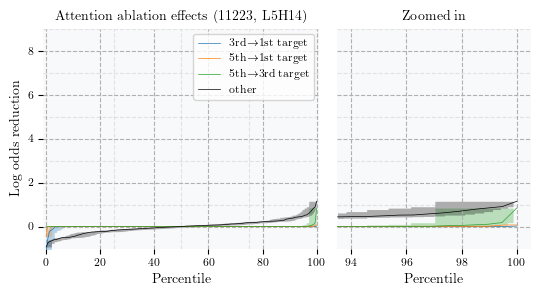

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L12H12


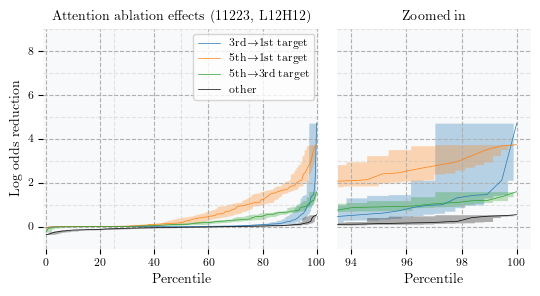

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L12H17


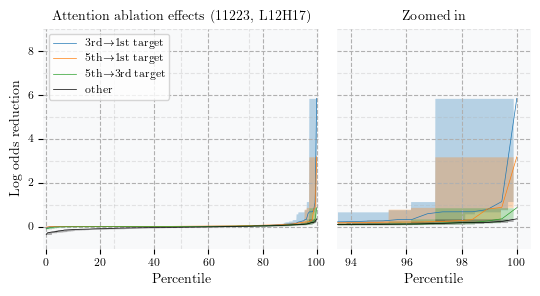

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L13H3


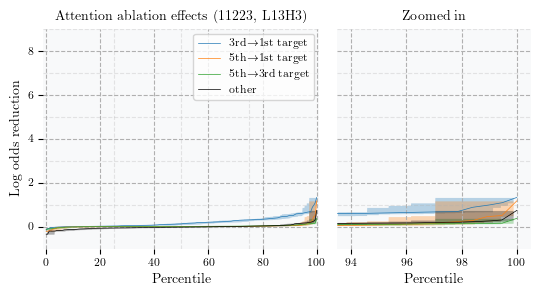

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L13H12


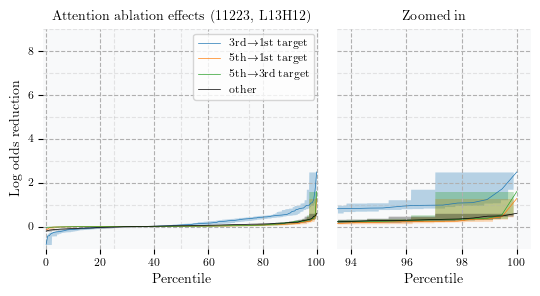

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L14H9


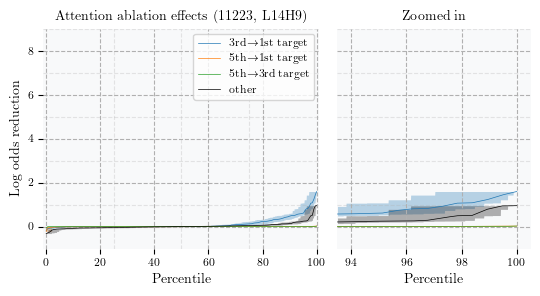

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L14H11


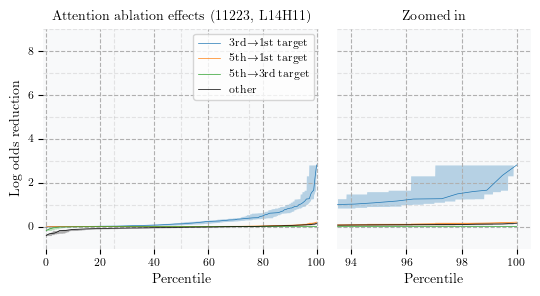

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L12H12


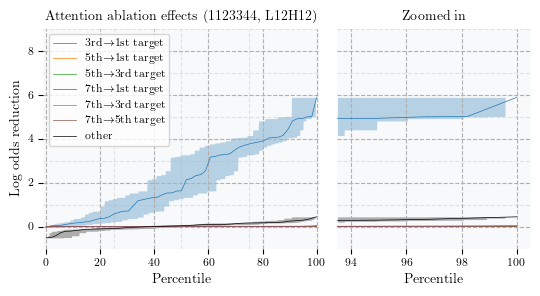

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L12H17


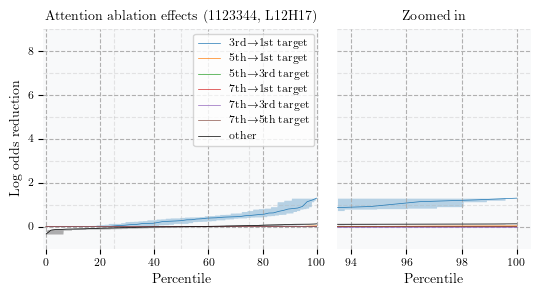

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H3


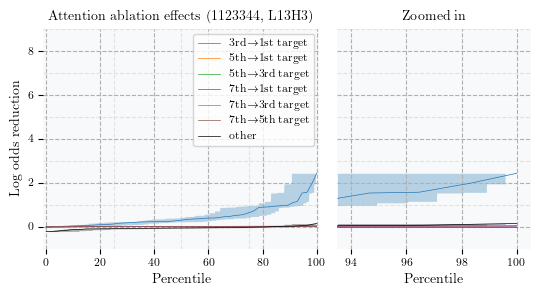

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H18


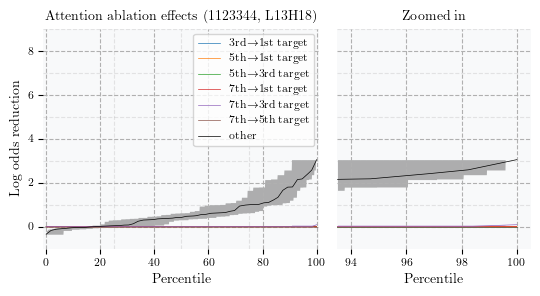

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H12


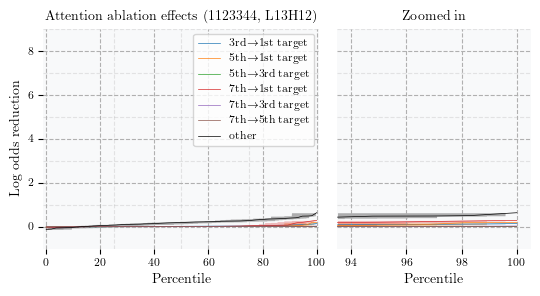

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L7H19


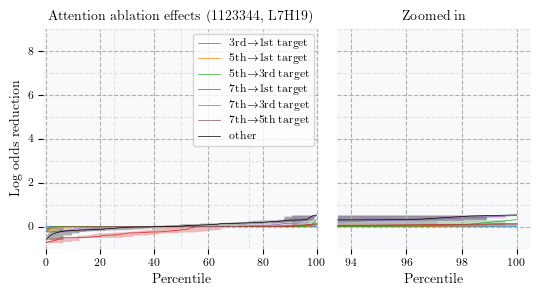

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

112 L12H12


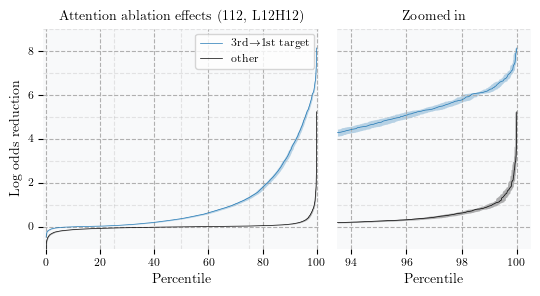

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

123 L12H12


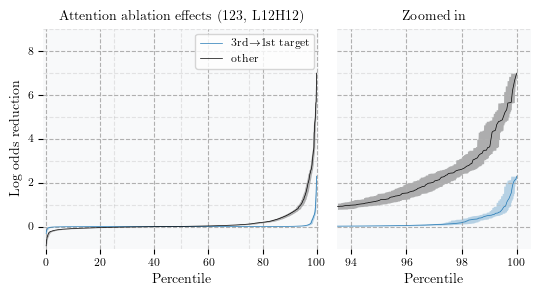

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11231 L12H17


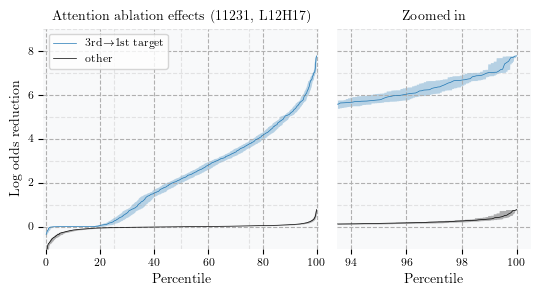

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11233 L12H12


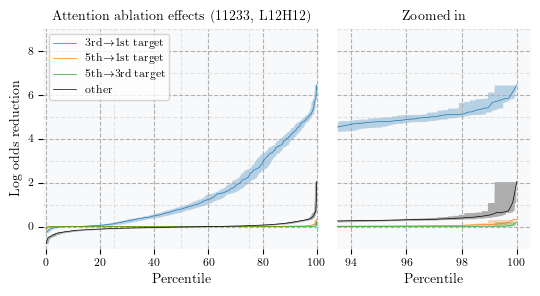

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11233 L13H3


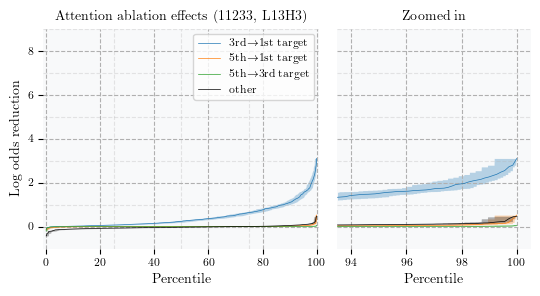

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L12H12


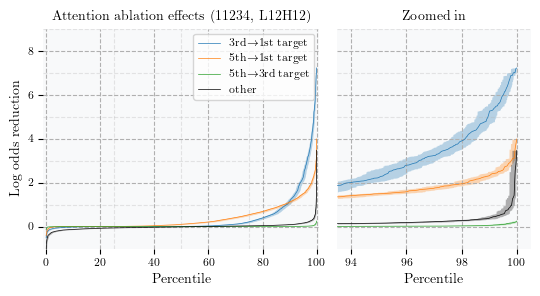

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L13H3


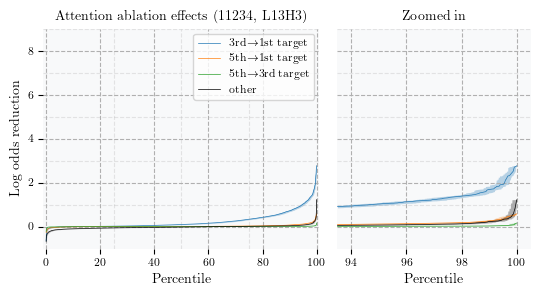

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L12H17


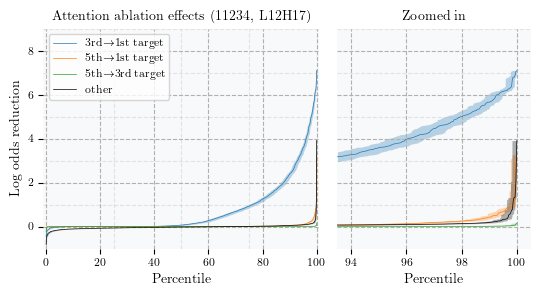

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123456 L12H12


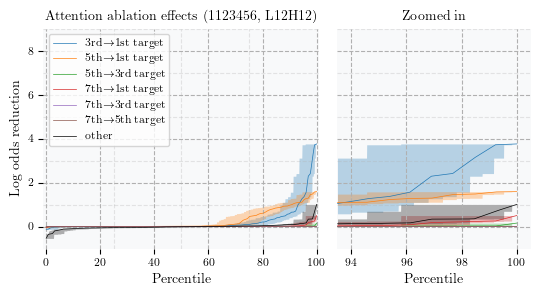

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12223 L12H12


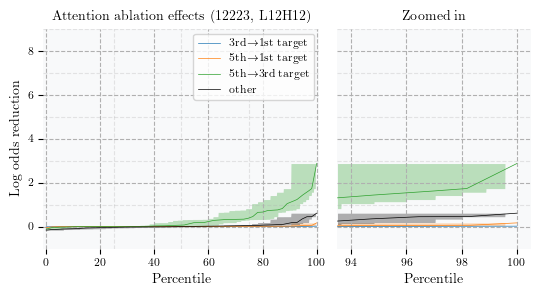

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12223 L10H22


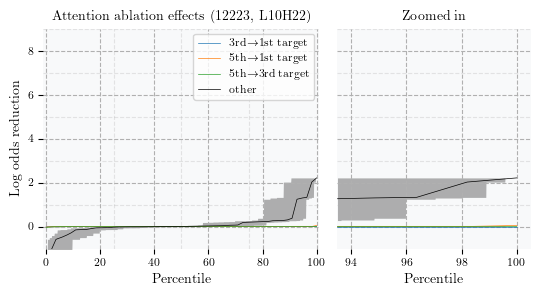

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12334 L12H12


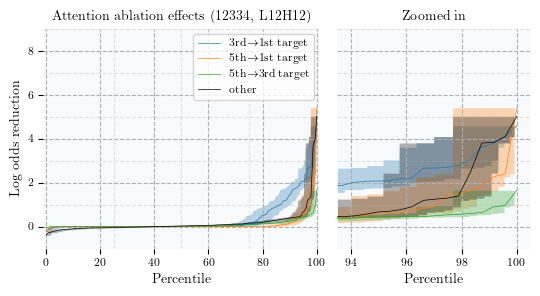

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12334 L12H17


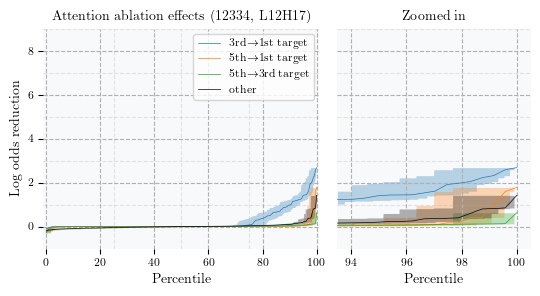

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12344 L12H12


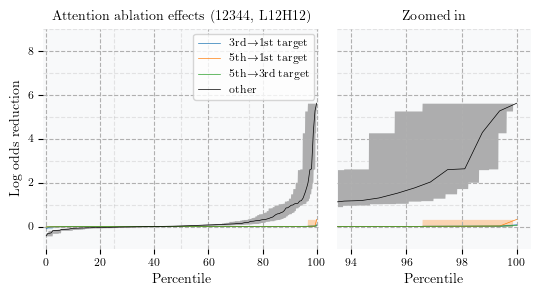

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12344 L13H18


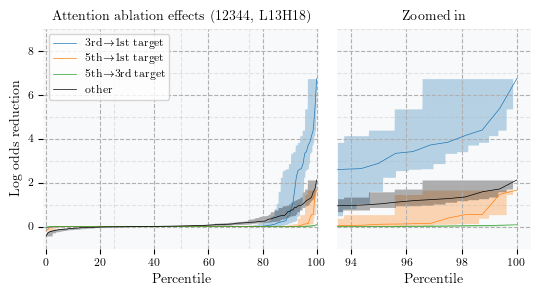

In [57]:
ablation_configs = [
    (['L5H14', 'L12H12', 'L12H17', 'L13H3', 'L13H12', 'L14H9', 'L14H11'], "11223"),
    (['L12H12', 'L12H17', 'L13H3', 'L13H18', 'L13H12', 'L7H19'], "1123344"),
    (['L12H12'], "112"),
    (['L12H12'], "123"),
    (['L12H17'], "11231"),
    (['L12H12', 'L13H3'], "11233"),
    (['L12H12', 'L13H3', 'L12H17'], "11234"),
    (['L12H12'], "1123456"),
    (['L12H12', 'L10H22'], "12223"),
    (['L12H12', 'L12H17'], "12334"),
    (['L12H12', 'L13H18'], "12344")
]

for cases, puzzle_set in ablation_configs:
    for case in cases:
        ablation_study = AblationStudy(folder_name=case + "_" + puzzle_set)
        print(puzzle_set, case)
        ablation_study.plot_ablation_effects(filename=f"ablation_effects_{case}_{puzzle_set}.pdf", puzzle_set=puzzle_set, LH=case)

# Probing

In [3]:
from leela_interp.core.probing_study import *

130


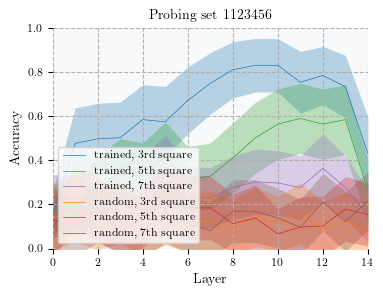

57


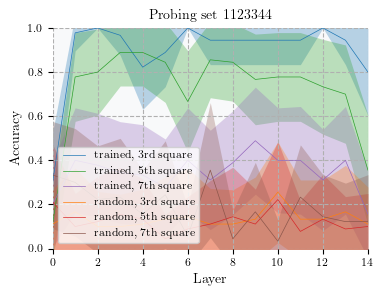

185


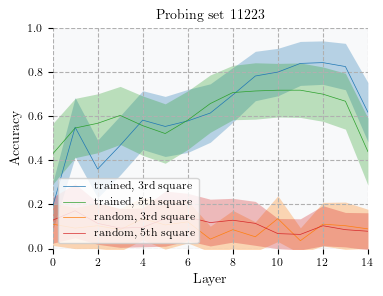

3126


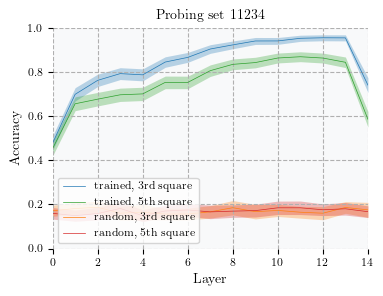

160


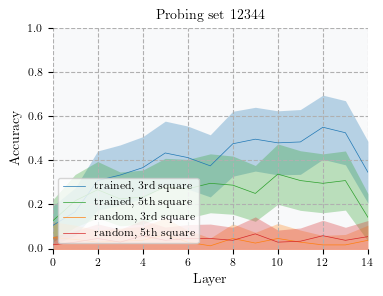

676


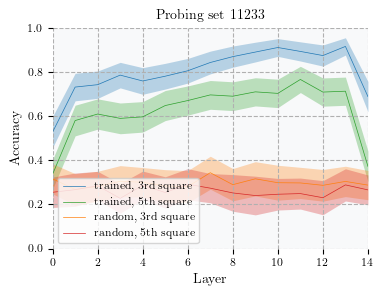

430


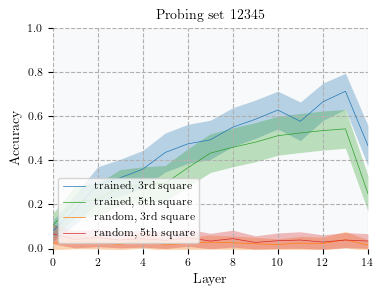

237


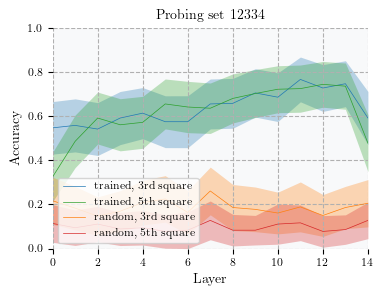

In [8]:
cases = ['1123456', '1123344', '11223', '11234', '12344', '11233', '12345', '12334']

for case in cases:
    probing_study = ProbingStudy(case_number=case)
    print(probing_study.n_examples)
    probing_study.plot_probe_results()